In [156]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

from sklearn.manifold import TSNE

In [238]:
data = pd.read_excel('all_excel.xlsx')

In [239]:
df = data.drop(['contender', 'address', 'song'], axis=1)

In [240]:
sexuality_dict = {
    'M':0,
    'F':1,
    'D':2
}

genre_dict = {
    'Thai Country':0,
    'Pop':1,
    'Rock':2,
    'Alternative':3,
    'Country':4,
    'Jazz':5,
    'R&B':6,
    'Soul':7,
    'Acoustic':8,
    'Hip-Hop':9,
    'Blues':10
}

language_dict = {
    'th':0,
    'en':1,
    'jp':2,
    'kr':2,
    'cn':2
}

age_dict = {
    '<20':0,
    '21-29':1,
    '30-39':2,
    '>30':3,
}

In [241]:
df['sexuality'] = df['sexuality'].apply(lambda x: sexuality_dict[x])
df['genre'] = df['genre'].apply(lambda x: genre_dict[x])
df['language'] = df['language'].apply(lambda x: language_dict[x])

In [242]:
df["num_coach"] = df.apply(lambda row: row[4] + row[5] + row[6] + row[7] + row[8] + row[9], axis = 1) # lambda function to check if they match. row.name gets the index

In [243]:
data_train = df[['sexuality', 'genre', 'language']]
np_data_train = data_train.values

In [244]:
np_data_train_normed = np_data_train / np_data_train.max(axis=0)

In [245]:
embedded = TSNE(n_components=2).fit_transform(np_data_train_normed)

In [246]:
x_tsne = embedded[:,0]
y_tsne = embedded[:,1]
embedded_df = pd.DataFrame({'x':x_tsne, 'y':y_tsne})

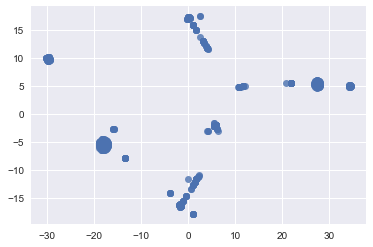

In [247]:
sns.regplot(x=x_tsne, y=y_tsne, fit_reg=False)
plt.show()

In [248]:
embedded_df = pd.DataFrame({'x':x_tsne, 'y':y_tsne})

In [249]:
concat_tsne_df = pd.concat([df,embedded_df],axis=1)

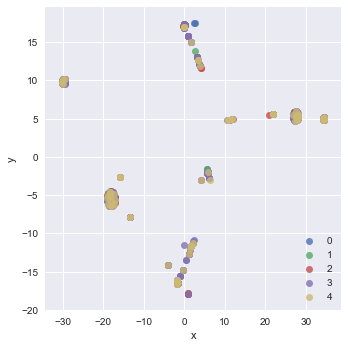

In [250]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=False, hue='num_coach', legend=False)
plt.legend(loc='lower right')
plt.show()

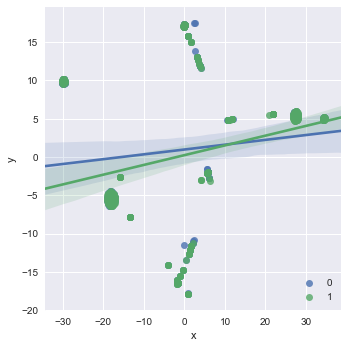

In [251]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Joey', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

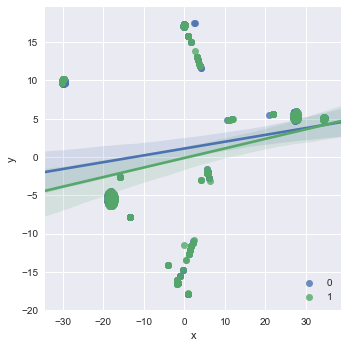

In [252]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Kim', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

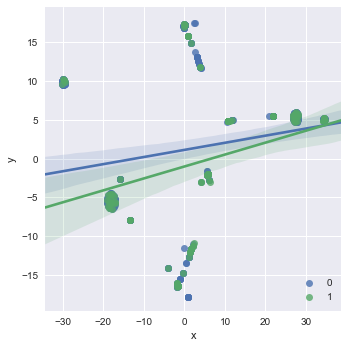

In [253]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Stamp', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

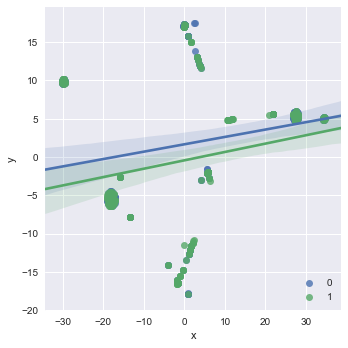

In [254]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Kong', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

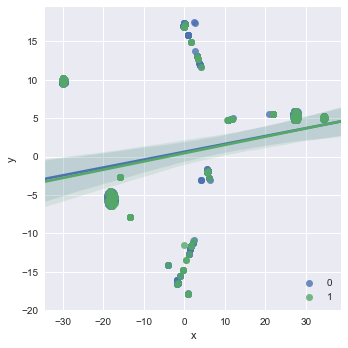

In [255]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Singto', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

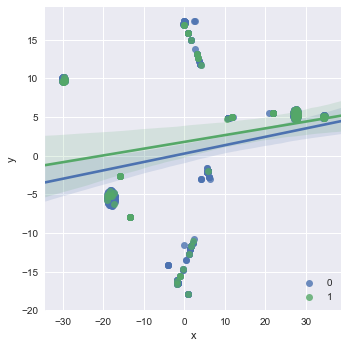

In [256]:
sns.lmplot( x="x", y="y", data=concat_tsne_df, fit_reg=True, hue='Da', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

In [257]:
from kmodes.kmodes import KModes

In [258]:
km = KModes(n_clusters=6, init='Huang', n_init=100, verbose=1)

clusters = km.fit_predict(data_train)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 46, cost: 204.0
Run 1, iteration: 2/100, moves: 2, cost: 204.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 85, cost: 239.0
Run 2, iteration: 2/100, moves: 0, cost: 239.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 45, cost: 221.0
Run 3, iteration: 2/100, moves: 0, cost: 221.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 231.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 50, cost: 243.0
Run 6, iteration: 2/100, moves: 0, cost: 243.0
Init: initializing centroids
Init: initializin

Init: initializing clusters
Starting iterations...
Run 55, iteration: 1/100, moves: 4, cost: 264.0
Run 55, iteration: 2/100, moves: 0, cost: 264.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 56, iteration: 1/100, moves: 0, cost: 246.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 57, iteration: 1/100, moves: 47, cost: 225.0
Run 57, iteration: 2/100, moves: 0, cost: 225.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 58, iteration: 1/100, moves: 54, cost: 249.0
Run 58, iteration: 2/100, moves: 0, cost: 249.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 59, iteration: 1/100, moves: 0, cost: 251.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 60, iteration: 1/100, moves: 69, cost: 238.0
Run 60, iteration: 2/100, moves: 46, cost: 238.0
Init: initializing centroids
Init: initializing clusters
Starting

In [259]:
cluster_df = pd.DataFrame({'cluster': clusters})

In [260]:
concat_df = pd.concat([df,cluster_df],axis=1)

In [261]:
concat_df

,sexuality,age,genre,language,Kong,Kim,Joey,Stamp,Singto,Da,num_coach,cluster
0,0,20,1,0,0,0,1,1,0,0,2,2
1,1,27,8,0,1,1,0,1,0,0,3,4
2,0,23,1,1,0,0,0,0,0,0,0,3
3,1,31,8,1,1,1,1,1,0,0,4,0
4,0,16,1,0,0,1,1,1,0,0,3,2
5,1,21,6,0,1,1,0,1,0,0,3,4
6,2,"28,34",8,0,0,1,1,1,0,0,3,1
7,0,24,1,0,1,1,1,1,0,0,4,2
8,0,34,2,1,0,0,0,0,0,0,0,3
9,1,42,5,1,0,0,0,0,0,0,0,0


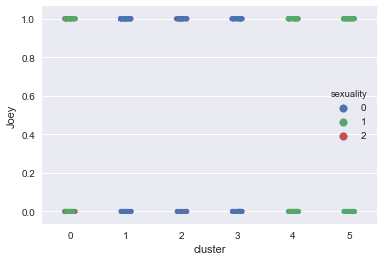

In [262]:
sns.stripplot(x="cluster", y="Joey", hue='sexuality', data=concat_df, jitter=True);
plt.show()

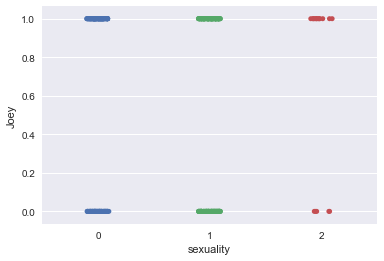

In [266]:
sns.stripplot(x="sexuality", y="Joey", data=concat_df, jitter=True);
plt.show()

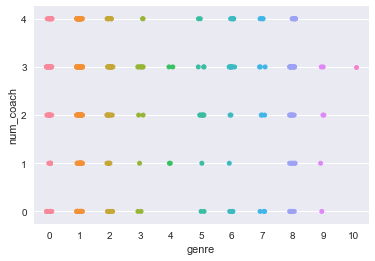

In [267]:
sns.stripplot(x="genre", y="num_coach", data=concat_df, jitter=True);
plt.show()

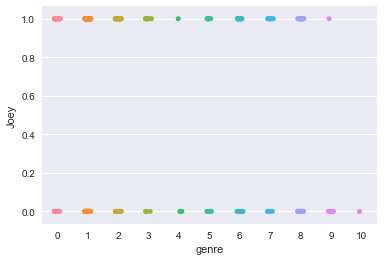

In [268]:
sns.stripplot(x="genre", y="Joey", data=concat_df, jitter=True);
plt.show()

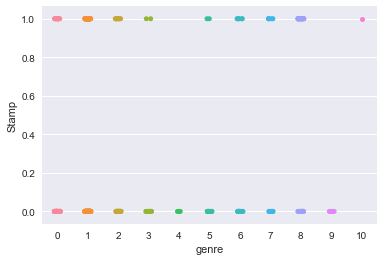

In [269]:
sns.stripplot(x="genre", y="Stamp", data=concat_df, jitter=True);
plt.show()

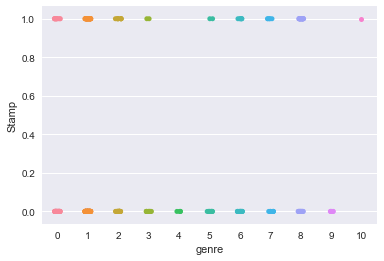

In [272]:
sns.stripplot(x="genre", y="Stamp", data=concat_df, jitter=True);
plt.show()

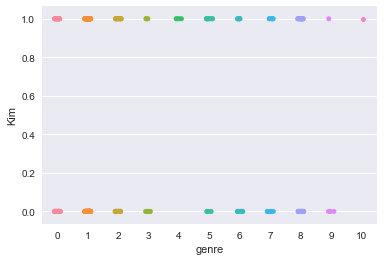

In [271]:
sns.stripplot(x="genre", y="Kim", data=concat_df, jitter=True);
plt.show()

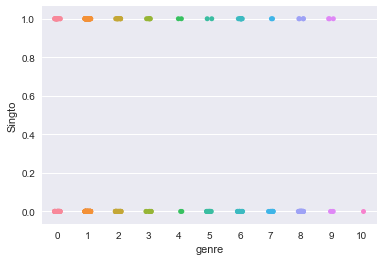

In [273]:
sns.stripplot(x="genre", y="Singto", data=concat_df, jitter=True);
plt.show()